## **`Assignment-5`** : **Compute performance metrics for the given Y & Y_score w/o sklearn**

1. [Task-A](#Task-A)
2. [Task-B](#Task-B)
3. [Task-C](#Task-C)
4. [Task-D](#Task-D)

In [1]:
import numpy as np
import pandas as pd

# Importing visualization libraries for plotting purpose
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### **`Task-A`**

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
task_a_scores = pd.read_csv("5_a.csv").rename(columns={'proba':'y_score'})
task_a_scores.head()

,y,y_score
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
task_a_scores.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        10100 non-null  float64
 1   y_score  10100 non-null  float64
dtypes: float64(2)
memory usage: 157.9 KB


In [4]:
tgt_cls_rec_count = pd.DataFrame(task_a_scores['y'].value_counts()).reset_index().rename(columns={'index':'Tgt_Class','y':'Record_Count'})

In [5]:
tgt_cls_rec_count

,Tgt_Class,Record_Count
0,1.0,10000
1,0.0,100


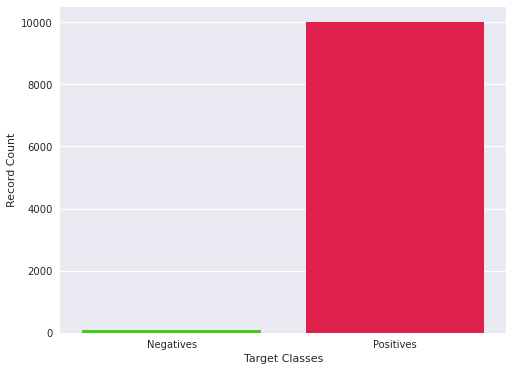

In [6]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,6))
    sns.barplot(x='Tgt_Class',y='Record_Count',data=tgt_cls_rec_count,palette='prism')
    plt.xticks(ticks=(0,1),labels=('Negatives','Positives'))
    plt.xlabel('Target Classes')
    plt.ylabel('Record Count')

In [7]:
task_a_scores['y_pred'] = task_a_scores['y_score'].apply(lambda val: 0 if val < 0.5 else 1)

In [8]:
y_pred_rec_cnt = pd.DataFrame(task_a_scores['y_pred'].value_counts()).reset_index().rename(columns={'index':'y_pred_class'})

In [9]:
y_pred_rec_cnt

,y_pred_class,y_pred
0,1,10100


In [10]:
task_a_scores

,y,y_score,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1
...,...,...,...
10095,1.0,0.665371,1
10096,1.0,0.607961,1
10097,1.0,0.777724,1
10098,1.0,0.846036,1


In [11]:
task_a_scores.groupby(['y','y_pred']).count().reset_index()

,y,y_pred,y_score
0,0.0,1,100
1,1.0,1,10000


In [12]:
def conf_mat_f1_scr(df_obj):
    """
    Desciprtion : This function is created for generating the Confusion Matrix and F1 Score.
    
    Input Parameters: It accepts only one parameter:
        `df_obj`: Pandas Dataframe
            Dataframe containing the `actual y` named as 'y' and `predicted y` named as 'y_pred'.
            
    Return: It returns the below performance metrics:
        Confusion Matrix
            [[tns,fns],
             [fps,tps]]
        F1 Score
            (2.0 * prec * recall)/(prec+recall)
        Accuracy Score
            (tps+tns)/(tps+tns+fps+fns)
    """
    tps_flg = []
    tns_flg = []
    fps_flg = []
    fns_flg = []
    temp_df = df_obj[['y','y_pred']].apply(lambda row: tps_flg.append('11') if row['y']==1 and row['y_pred']==1 else\
                                    tns_flg.append('00') if row['y']==0 and row['y_pred']==0 else\
                                    fps_flg.append('01') if row['y']==0 and row['y_pred']==1 else\
                                    fns_flg.append('10') if row['y']==1 and row['y_pred']==0 else 0,axis=1)
    tps = len(tps_flg)                   ## True +ve rate
    tns = len(tns_flg)                   ## True -ve rate
    fps = len(fps_flg)                   ## False +ve rate
    fns = len(fns_flg)                   ## False -ve rate
    conf_mat = np.array([[tns,fns],      ## Generating Confusion Matrix
                         [fps,tps]])
    
    prec = np.divide(tps*1.0,(tps+fps))      ## Precision
    recall = np.divide(tps*1.0,(tps+fns))    ## Recall
    f1_scr = np.divide((2.0 * prec * recall),(prec+recall))   ## Calculating F1-Score
    acc_scr = np.divide((tps+tns)*1.0,(tps+tns+fps+fns))      ## Calculating Accuracy Score
    del temp_df
    return conf_mat, f1_scr, acc_scr

In [13]:
task_a_conf_mat, task_a_f1_scr, task_a_acc_scr = conf_mat_f1_scr(task_a_scores)

In [14]:
task_a_conf_mat

array([[    0,     0],
       [  100, 10000]])

In [15]:
task_a_f1_scr

0.9950248756218906

In [16]:
task_a_acc_scr

0.9900990099009901

In [17]:
def roc_auc_scr(df_obj,y_prob_round_flg=3):
    """   
    Desciprtion : This function is created for calculating the TPR and FPR based on the different thresholds.
    
    Input Parameters: It accepts only one parameter:
        `df_obj`: Pandas Dataframe
            Dataframe containing the `actual y` named as 'y' and `y proba score` named as 'y_score'.
        
        `y_prob_round_flg`: int
            By default 2. This is just a flag variable for controlling the number of unique scores.
            
    Return: It returns the below arrays:
        TPR
        FPR
    """
    tpr_val = []
    fpr_val = []

    th_res_df = df_obj.copy(deep=True)
    # Rounding-off the scores for controlling the number of unique scores
    th_res_df['y_score'] = np.round(th_res_df['y_score'],y_prob_round_flg)
    # Sorting the unique score in descending order
    thres_vals = th_res_df.sort_values(by='y_score',ascending=False)['y_score'].unique()
    # Sorting the df in descending order based on rounded-off scores
    th_res_df.sort_values(by='y_score',ascending=False,ignore_index=True,inplace=True)

    # Generating the y outcome threshold columns based on threshold value
    for i,th_val in enumerate(thres_vals):
        th_tps = []
        th_tns = []
        th_fps = []
        th_fns = []
        th_res_df['y_tao'+str(i)] = th_res_df['y_score'].apply(lambda row_val: 1 if row_val >= th_val else 0)
        tmp_tsk2 = th_res_df[['y','y_tao'+str(i)]].apply(lambda row: th_tps.append('11') if row['y']==1 and row['y_tao'+str(i)]==1 else\
                                        th_tns.append('00') if row['y']==0 and row['y_tao'+str(i)]==0 else\
                                        th_fps.append('01') if row['y']==0 and row['y_tao'+str(i)]==1 else\
                                        th_fns.append('10') if row['y']==1 and row['y_tao'+str(i)]==0 else 0,axis=1)
        th_tpr = np.divide(len(th_tps),(len(th_tps)+len(th_fns)))     ## Calculating TPR based on threshold value
        th_fpr = np.divide(len(th_fps),(len(th_fps)+len(th_tns)))     ## Calculating FPR based on threshold value
        tpr_val.append(th_tpr)
        fpr_val.append(th_fpr)
    
    del th_res_df, tmp_tsk2
    return tpr_val, fpr_val

In [18]:
tpr_arr, fpr_arr = roc_auc_scr(task_a_scores)

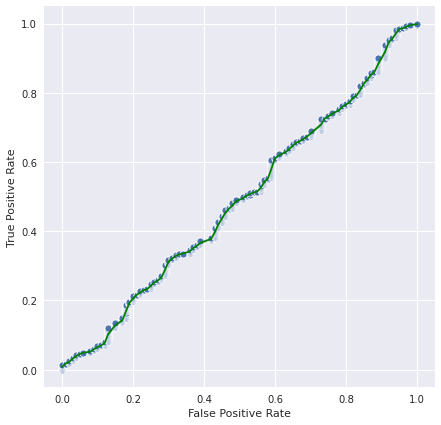

In [19]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,7))
    sns.scatterplot(x=fpr_arr,y=tpr_arr,palette='twilight')
    sns.lineplot(x=fpr_arr,y=tpr_arr,color='green')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [20]:
len(tpr_arr),len(fpr_arr)

(401, 401)

In [21]:
## AUC Score
np.trapz(tpr_arr,fpr_arr)

0.48827050000000005

#### **`Task-B`**

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [22]:
task_b_scores = pd.read_csv("5_b.csv").rename(columns={'proba':'y_score'})
task_b_scores.head()

,y,y_score
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [23]:
task_b_scores.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        10100 non-null  float64
 1   y_score  10100 non-null  float64
dtypes: float64(2)
memory usage: 157.9 KB


In [24]:
tgt_cls_rec_count = pd.DataFrame(task_b_scores['y'].value_counts()).reset_index().rename(columns={'index':'Tgt_Class','y':'Record_Count'})

In [25]:
tgt_cls_rec_count

,Tgt_Class,Record_Count
0,0.0,10000
1,1.0,100


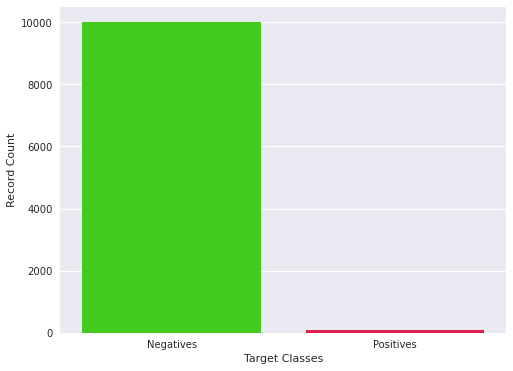

In [26]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,6))
    sns.barplot(x='Tgt_Class',y='Record_Count',data=tgt_cls_rec_count,palette='prism')
    plt.xticks(ticks=(0,1),labels=('Negatives','Positives'))
    plt.xlabel('Target Classes')
    plt.ylabel('Record Count')

In [27]:
task_b_scores['y_pred'] = task_b_scores['y_score'].apply(lambda val: 0 if val < 0.5 else 1)

In [28]:
y_pred_rec_cnt = pd.DataFrame(task_b_scores['y_pred'].value_counts()).reset_index().rename(columns={'index':'y_pred_class'})

In [29]:
y_pred_rec_cnt

,y_pred_class,y_pred
0,0,9806
1,1,294


In [30]:
task_b_conf_mat, task_b_f1_scr, task_b_acc_scr = conf_mat_f1_scr(task_b_scores)

In [31]:
task_b_conf_mat

array([[9761,   45],
       [ 239,   55]])

In [32]:
task_b_f1_scr

0.2791878172588833

In [33]:
task_b_acc_scr

0.9718811881188119

In [34]:
tpr_arr, fpr_arr = roc_auc_scr(task_b_scores)

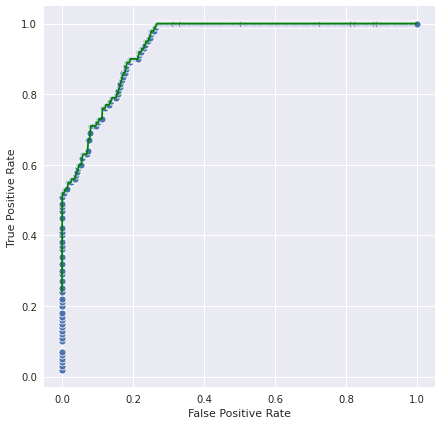

In [35]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,7))
    sns.scatterplot(x=fpr_arr,y=tpr_arr,palette='twilight')
    sns.lineplot(x=fpr_arr,y=tpr_arr,color='green')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [36]:
len(tpr_arr),len(fpr_arr)

(446, 446)

In [37]:
## AUC Score
np.trapz(tpr_arr,fpr_arr)

0.937801

#### **`Task-C`**

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [38]:
task_c_scores = pd.read_csv("5_c.csv").rename(columns={'prob':'y_score'})
task_c_scores.head()

,y,y_score
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [39]:
task_c_scores.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        2852 non-null   int64  
 1   y_score  2852 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 44.7 KB


In [40]:
tgt_cls_rec_count = pd.DataFrame(task_c_scores['y'].value_counts()).reset_index().rename(columns={'index':'Tgt_Class','y':'Record_Count'})

In [41]:
tgt_cls_rec_count

,Tgt_Class,Record_Count
0,0,1805
1,1,1047


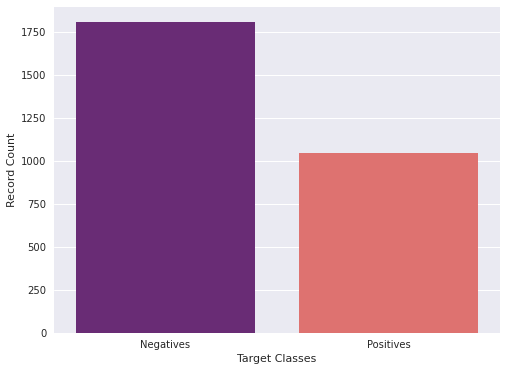

In [42]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,6))
    sns.barplot(x='Tgt_Class',y='Record_Count',data=tgt_cls_rec_count,palette='magma')
    plt.xticks(ticks=(0,1),labels=('Negatives','Positives'))
    plt.xlabel('Target Classes')
    plt.ylabel('Record Count')

In [43]:
def Calc_Min_A(df_obj,y_prob_round_flg=3):
    """   
    Desciprtion : This function is created for calculating minimum of A based FNS and FPS generated from the different thresholds.
    
    Input Parameters: It accepts only one parameter:
        `df_obj`: Pandas Dataframe
            Dataframe containing the `actual y` named as 'y' and `y proba score` named as 'y_score'.
        
        `y_prob_round_flg`: int
            By default 2. This is just a flag variable for controlling the number of unique scores.
            
    Return: 
        `Min_A_df` : Pandas Dataframe
    It returns the pandas dataframe sorted as per the minimum value of A for different thresholds.
    """
    fns_val = []
    fps_val = []
    A_op = []
    thresholds = []

    th_res_df = df_obj.copy(deep=True)
    # Rounding-off the scores for controlling the number of unique scores
    th_res_df['y_score'] = np.round(th_res_df['y_score'],y_prob_round_flg)
    # Sorting the unique score in descending order
    thres_vals = th_res_df.sort_values(by='y_score',ascending=False)['y_score'].unique()
    # Sorting the df in descending order based on rounded-off scores
    th_res_df.sort_values(by='y_score',ascending=False,ignore_index=True,inplace=True)

    # Generating the y outcome threshold columns based on threshold value
    for i,th_val in enumerate(thres_vals):
        th_fps = []
        th_fns = []
        th_res_df['y_tao'+str(i)] = th_res_df['y_score'].apply(lambda row_val: 1 if row_val >= th_val else 0)
        tmp_tsk3 = th_res_df[['y','y_tao'+str(i)]].apply(lambda row: th_fps.append('01') if row['y']==0 and row['y_tao'+str(i)]==1 else\
                                            th_fns.append('10') if row['y']==1 and row['y_tao'+str(i)]==0 else 0,axis=1)
        n_fns = len(th_fns)
        n_fps = len(th_fps)
        A = (500.0 * n_fns) + (100.0 * n_fps)
        thresholds.append(th_val)
        fns_val.append(n_fns)
        fps_val.append(n_fps)
        A_op.append(A)

    Min_A_df = pd.DataFrame({'A_op':A_op,'fns':fns_val,'fps':fps_val,'th_val':thresholds})
    Min_A_df.sort_values(by='A_op',ascending=True,ignore_index=True,inplace=True)
    del th_res_df, tmp_tsk3
    return Min_A_df

In [44]:
task3_op_df = Calc_Min_A(df_obj=task_c_scores)

In [45]:
task3_op_df

,A_op,fns,fps,th_val
0,141400.0,78,1024,0.230
1,141600.0,78,1026,0.229
2,141700.0,100,917,0.252
3,141700.0,99,922,0.251
4,141800.0,78,1028,0.228
...,...,...,...,...
777,521000.0,1042,0,0.941
778,521500.0,1043,0,0.944
779,522000.0,1044,0,0.949
780,522500.0,1045,0,0.951


In [46]:
## Minimum value of A
task3_op_df.head(1)

,A_op,fns,fps,th_val
0,141400.0,78,1024,0.23


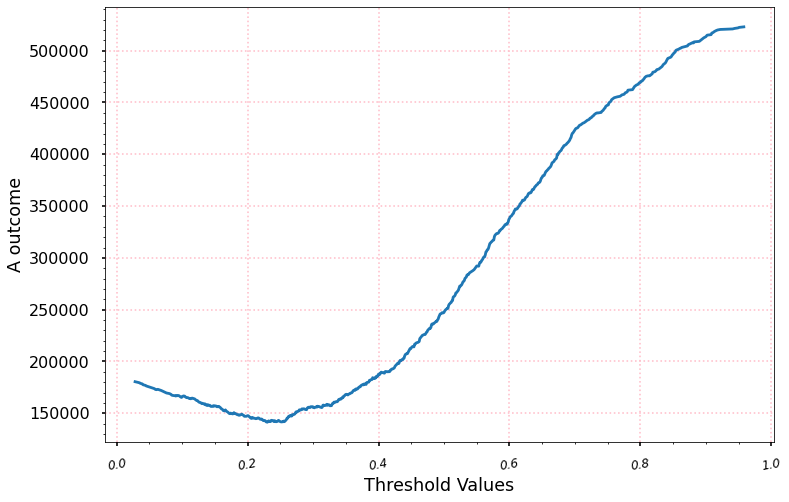

In [47]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    sns.lineplot(x='th_val',y='A_op',data=task3_op_df,palette='twilight')
    plt.grid(which='major',linestyle=':',color='pink')
    plt.minorticks_on()
    plt.xticks(rotation=10,size=12,style='oblique')
    plt.xlabel('Threshold Values')
    plt.ylabel('A outcome')

#### **`Task-D`**

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [48]:
task_d_scores = pd.read_csv("5_d.csv").rename(columns={'pred':'y_pred'})
task_d_scores.head()

,y,y_pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [49]:
task_d_scores.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157200 entries, 0 to 157199
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       157200 non-null  float64
 1   y_pred  157200 non-null  float64
dtypes: float64(2)
memory usage: 2.4 MB


In [52]:
task_d_scores['Err'] = task_d_scores['y'] - task_d_scores['y_pred']
task_d_scores['Err_sqr'] = np.square(task_d_scores['Err'])
task_d_scores['Err_abs'] = np.abs(task_d_scores['Err'])

In [55]:
task_d_scores

,y,y_pred,Err,Err_sqr,Err_abs
0,101.0,100.0,1.0,1.0,1.0
1,120.0,100.0,20.0,400.0,20.0
2,131.0,113.0,18.0,324.0,18.0
3,164.0,125.0,39.0,1521.0,39.0
4,154.0,152.0,2.0,4.0,2.0
...,...,...,...,...,...
157195,87.0,83.0,4.0,16.0,4.0
157196,97.0,86.0,11.0,121.0,11.0
157197,106.0,93.0,13.0,169.0,13.0
157198,105.0,101.0,4.0,16.0,4.0


In [57]:
mean_task_d_y = np.mean(task_d_scores['y'])
mean_task_d_y

66.56208651399491

In [67]:
task_d_scores['ST'] = np.square(task_d_scores['y'] - mean_task_d_y)

In [56]:
task_d_scores['Mod_Abs_Err'] = task_d_scores[['y','Err_abs']].apply(lambda row: row['Err_abs']/mean_task_d_y if row['y']==0 else\
                                                                   row['Err_abs']/row['y'],axis=1)

In [58]:
## Mean Squared Error
MSE = np.sum(task_d_scores['Err'])/task_d_scores.shape[0]
print("Mean Squared Error is {}".format(MSE))

Mean Squared Error is 0.07837150127226464


In [64]:
## Modified Mean Absolute Percentage Error
MMAPE = np.sum(task_d_scores['Mod_Abs_Err'])/task_d_scores.shape[0]
print("Mean Squared Error is {:.2f}%".format(MMAPE*100))

Mean Squared Error is 28.20%


In [69]:
## Sum of Squares of Residuals and Total Sum of squares
SS_res = np.sum(task_d_scores['Err_sqr'])
SS_tot = np.sum(task_d_scores['ST'])
SS_res, SS_tot

(27850448.0, 638161080.0356234)

In [70]:
## Coeff. of determination
R_sqr = 1 - (SS_res/SS_tot)
R_sqr

0.9563582786990937